## Dimensinality reduction

In [1]:
import pandas as pd
from utils import import_df

df = import_df("2-data-generation-output.json")
df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_vel,vib_z_acc,vib_z_f1,vib_z_f2,vib_z_f3,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
0,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,2.844896,1.684042,1.109990,2.106870,0.603318,0.362336,0.576215,2.100146,3.967956,working-engine-1
1,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,2.838546,1.700080,4.016145,6.259542,4.072398,0.352717,0.611753,2.122022,3.950103,working-engine-1
2,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,2.835371,1.668003,7.346115,10.625954,4.796380,0.353037,0.573677,2.068546,3.950103,working-engine-1
3,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,2.863947,1.684042,5.206862,7.816794,4.404223,0.358809,0.581292,2.100146,3.960632,working-engine-1
4,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,2.848071,1.684042,4.278507,6.473282,3.469080,0.353679,0.596522,2.102577,3.961089,working-engine-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22921,-0.268938,1.414533,0.354394,-0.523674,0.024835,0.203061,0.447671,0.150830,-0.205862,-1.117251,...,1.004175,1.017857,1.000000,1.000000,1.000000,0.959627,0.991923,0.987436,3.946513,working-engine-2
22922,-0.259951,1.954147,0.537901,-0.198132,0.366401,-0.272861,0.423512,-0.597262,0.034443,0.270281,...,1.025358,0.984092,1.000000,1.000000,1.000000,0.991787,0.986406,1.011077,3.945191,working-engine-2
22923,-0.444839,2.018371,0.946381,-0.345641,-0.131759,0.010222,-0.272155,-0.184941,-0.421114,-0.078990,...,1.024467,1.016894,1.000000,1.000000,1.000000,0.976782,0.899195,1.054571,3.933070,working-engine-2
22924,-0.072549,2.652426,1.244061,-0.422514,0.116106,0.115331,0.280605,-1.112310,-0.938030,0.222482,...,1.054740,1.017857,1.000000,1.000000,1.000000,0.986409,0.953667,1.024920,3.942832,working-engine-2


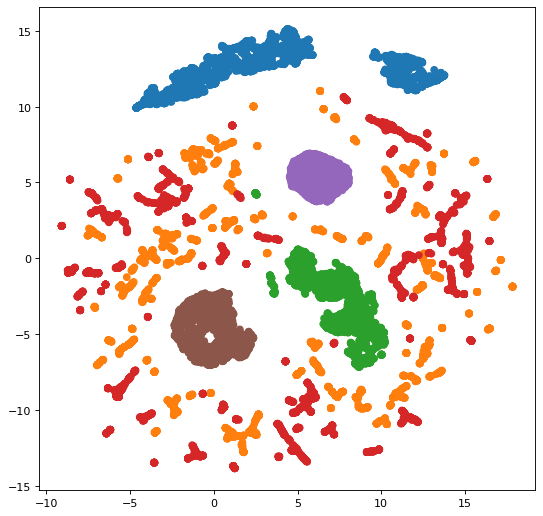

In [3]:
import umap
from matplotlib import pyplot as plt
import seaborn as sns

df_dr = df.drop(["label"], axis=1)
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_dr)

c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(embedding[:, 0], embedding[:, 1], c=c)
plt.show()

/home/marco/projects/SmartElevator/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/marco/projects/SmartElevator/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


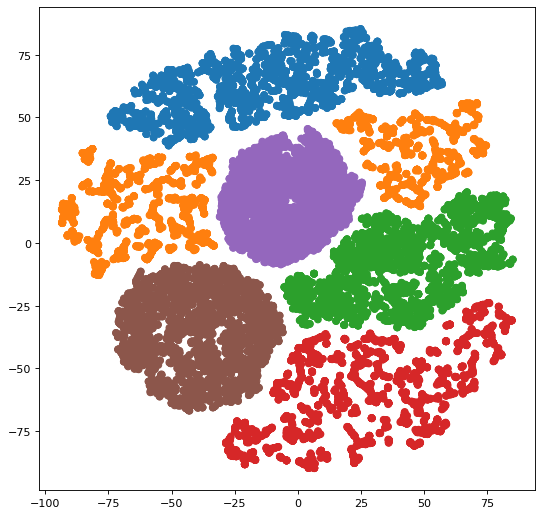

In [4]:
from sklearn.manifold import TSNE
reducer = TSNE()
embedding= reducer.fit_transform(df_dr)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(embedding[:, 0], embedding[:, 1],c=c)

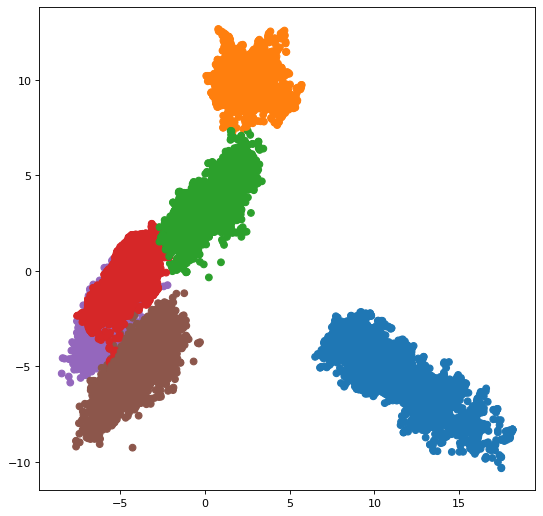

In [5]:
from sklearn.decomposition import PCA
reducer = PCA()
embedding= reducer.fit_transform(df_dr)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(embedding[:, 0], embedding[:, 1],c=c)

In [6]:
import seaborn as sns
import warnings

# with warnings.catch_warnings():
#     sns.pairplot(
#         df.reset_index()[[
#             # 's_00', 's_01', 's_02', 's_03', 's_04', 's_05', 's_06', 's_07', 's_08', 's_09', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
#             'sonic_custom', 'sonic_rmslog',
#             'vib_x_acc', 'vib_x_kurt', 'vib_x_peak', 'vib_x_vel',
#             'vib_y_acc', 'vib_y_kurt', 'vib_y_peak', 'vib_y_vel',
#             'vib_z_acc', 'vib_z_kurt', 'vib_z_peak', 'vib_z_vel',
#             'temperature_external', 'current',
#             'label'
#         ]],
#         kind="kde",
#         hue="label",
#         corner=True
#     )

## Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dr, df.label_int, test_size=0.20, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
acc = (pred == y_test).sum() / len(X_test)
print(f"{acc:.0%}")

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
acc = (pred == y_test).sum() / len(X_test)
print(f"{acc:.0%}")

## Root mean square error
Requires a prediction to have an error

In [ ]:
# # df_loc = df.loc[df["time"] == "2021-10-27 17:32:32.494"]
# df_loc = df.loc[df["time"] >= "2021-10-31 12:05:52.937"]
# print(df_loc.mean())
# df_loc

## Mesurements (For models)
